In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = np.loadtxt('./data/logisticX.csv',delimiter=',')
y = np.loadtxt('./data/logisticY.csv').reshape(-1,1)

x = (x - np.mean(x))/np.std(x)                  # Normalize
x = np.concatenate((np.ones((x.shape[0],1)),x),axis=1)

In [3]:
theta = np.zeros((x.shape[1],1))
sigmoid = lambda z: 1/(1 + np.exp(z))
pred = sigmoid(np.dot(x,theta))
diff = y - pred
cost = -1*np.sum(y*np.log(pred) + (1-y)*np.log(1-pred))
iterations = 0

while(cost > 0.0001 and iterations < 10):       # Stopping Criteria
    hessian = np.dot(np.dot(x.T,np.diag((pred*(1-pred)).reshape(-1,))),x)
    theta = theta - np.dot(np.linalg.pinv(hessian),np.dot(x.T,diff))
    pred = sigmoid(np.dot(x,theta))
    diff = y - pred
    cost = -1*np.sum(y*np.log(pred) + (1-y)*np.log(1-pred))
    iterations += 1
    print(iterations," - ",cost)

print("Final Cost - ",cost)
print("Final Parameters - {0},{1},{2}".format(theta[0],theta[1],theta[2]))

# theta[0] = -0.2130308
# theta[1] = -2.65801937
# theta[2] = 2.66106075

1  -  33.42765918144597
2  -  25.71546598475492
3  -  23.313638603439095
4  -  22.86096894933656
5  -  22.83427892979582
6  -  22.83414498837054
7  -  22.834144984472395
8  -  22.83414498447239
9  -  22.834144984472392
10  -  22.834144984472392
Final Cost -  22.834144984472392
Final Parameters - [-0.2130308],[-2.65801937],[2.66106075]


<IPython.core.display.Javascript object>


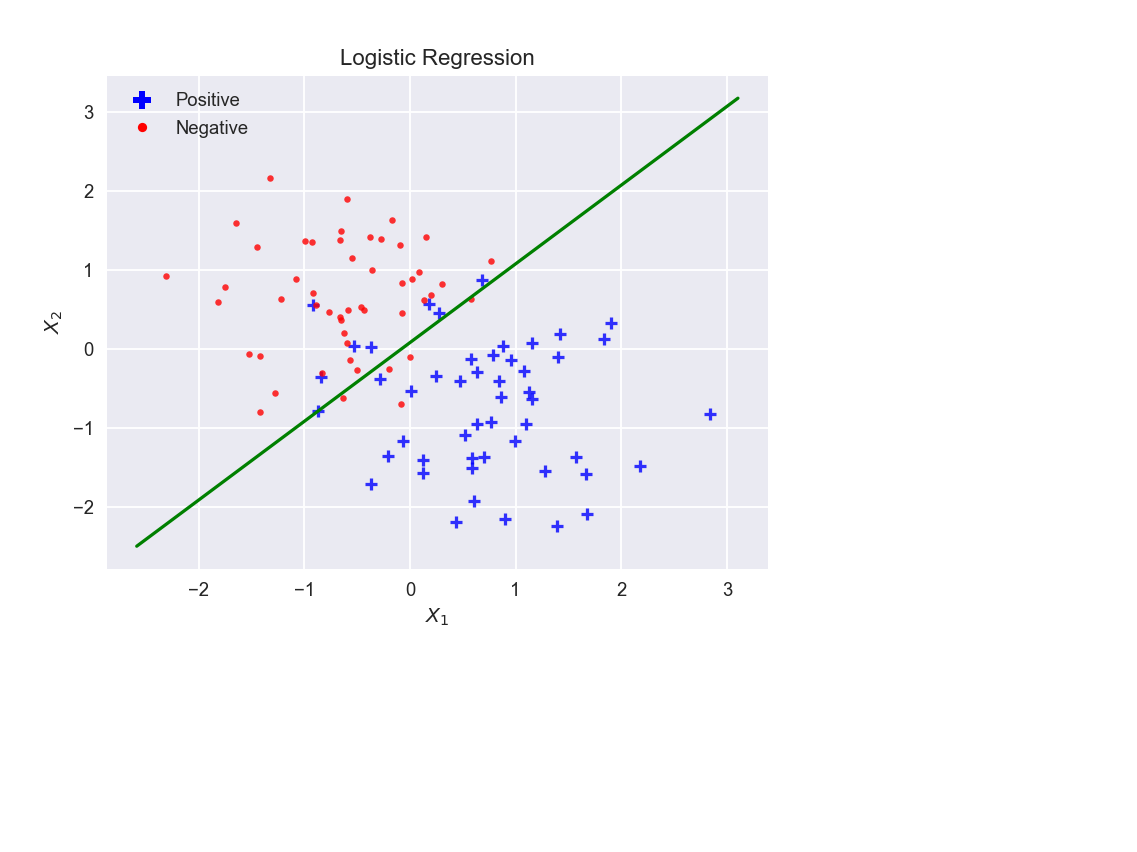

In [4]:
%matplotlib notebook

sns.set()
sns.regplot(x[(y == 1).reshape(-1,),1],x[(y == 1).reshape(-1,),2],fit_reg=False,marker='+',color='blue')
sns.regplot(x[(y == 0).reshape(-1,),1],x[(y == 0).reshape(-1,),2],fit_reg=False,marker='.',color='red')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = -1*(theta[0] + theta[1] * x_vals)/theta[2]
plt.plot(x_vals,y_vals,color='g')
plt.title("Logistic Regression")
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
neg_patch = plt.plot([],[],marker=".",ms=10,ls="",mec=None,color='red',label="Negative")[0]
pos_patch = plt.plot([],[],marker="P",ms=10,ls="",mec=None,color='blue',label="Positive")[0]
plt.legend(handles=[pos_patch,neg_patch],loc=2)
plt.show()